##1 LOAD AND READ THE DATASET 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV, SGDClassifier, RidgeClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import svm, linear_model
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read the uploaded dataset
ir=pd.read_csv('/content/drive/MyDrive/cancer dataset/Incidence.csv')

**DATA EXPLORATION**

In [4]:
#Dimension of the dataset
ir.shape

(3140, 11)

In [5]:
#To display the first 5 values of the dataset
ir.head()

,index,County,FIPS,Age-Adjusted Incidence Rate,Lower 95% Confidence Interval for Incidence Rate,Upper 95% Confidence Interval for Incidence Rate,Average Annual Count,Recent Trend,Recent 5-Year Trend in Incidence Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,1,Autauga County Alabama,1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
1,2,Baldwin County Alabama,1003,66.9,62.4,71.7,170,stable,3.0,-10.2,18.3
2,3,Barbour County Alabama,1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3
3,4,Bibb County Alabama,1007,86.4,71.0,104.2,23,stable,-4.5,-31.4,32.9
4,5,Blount County Alabama,1009,69.7,61.2,79.0,51,stable,-13.6,-27.8,3.4


In [6]:
#Information about the dataset 
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   index                                             3140 non-null   int64  
 1   County                                            3140 non-null   object 
 2    FIPS                                             3140 non-null   int64  
 3   Age-Adjusted Incidence Rate                       3140 non-null   float64
 4   Lower 95% Confidence Interval for Incidence Rate  3140 non-null   float64
 5   Upper 95% Confidence Interval for Incidence Rate  3140 non-null   float64
 6   Average Annual Count                              3140 non-null   int64  
 7   Recent Trend                                      3140 non-null   object 
 8   Recent 5-Year Trend in Incidence Rates            3140 non-null   float64
 9   Lower 95% Confidenc

In [7]:
#Descriptive statistics of the dataset 
ir.describe()

,index,FIPS,Age-Adjusted Incidence Rate,Lower 95% Confidence Interval for Incidence Rate,Upper 95% Confidence Interval for Incidence Rate,Average Annual Count,Recent 5-Year Trend in Incidence Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1570.500000,30401.960828,60.695478,50.187930,73.672038,66.431847,-0.956752,-14.827070,17.915573
std,906.584249,15150.904099,28.493921,24.376229,35.135227,167.661977,7.362751,13.245046,22.785845
min,1.000000,1001.000000,1.000000,1.000000,1.000000,1.000000,-40.100000,-69.000000,-12.100000
25%,785.750000,18180.500000,50.700000,39.575000,62.200000,8.000000,-4.700000,-23.100000,3.000000
50%,1570.500000,29178.000000,66.300000,55.200000,78.900000,22.000000,-0.600000,-13.200000,10.800000
75%,2355.250000,45081.500000,78.200000,66.500000,93.800000,56.000000,2.800000,-4.200000,25.500000
max,3140.000000,56045.000000,203.700000,172.400000,239.100000,3701.000000,44.200000,19.400000,195.900000


In [8]:
#To determine the datatypes of all the columns
ir.dtypes

index                                                 int64
County                                               object
 FIPS                                                 int64
Age-Adjusted Incidence Rate                         float64
Lower 95% Confidence Interval for Incidence Rate    float64
Upper 95% Confidence Interval for Incidence Rate    float64
Average Annual Count                                  int64
Recent Trend                                         object
Recent 5-Year Trend in Incidence Rates              float64
Lower 95% Confidence Interval for Trend             float64
Upper 95% Confidence Interval for Trend             float64
dtype: object

In [9]:
#To determine the datatype of all the columns along with null value count and unique value count
temp=pd.DataFrame(index=ir.columns)
temp['data_types']=ir.dtypes
temp['null_values']=ir.isnull().sum()
temp['unique_count']=ir.nunique()
temp

,data_types,null_values,unique_count
index,int64,0,3140
County,object,0,3140
FIPS,int64,0,3140
Age-Adjusted Incidence Rate,float64,0,742
Lower 95% Confidence Interval for Incidence Rate,float64,0,698
Upper 95% Confidence Interval for Incidence Rate,float64,0,869
Average Annual Count,int64,0,360
Recent Trend,object,0,6
Recent 5-Year Trend in Incidence Rates,float64,0,398
Lower 95% Confidence Interval for Trend,float64,0,515


##2 PERFORM BELOW VISUALIZATIONS
*   Univariate Analysis
*   Bi-variate Analysis
*   Multi-variate Analysis


**UNIVARIATE ANALYSIS**

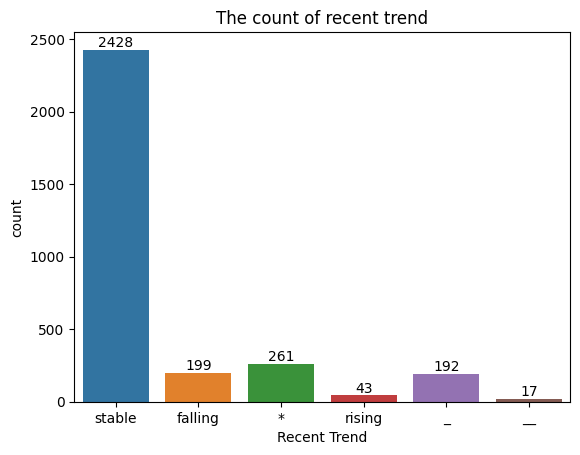

In [10]:
#CountPlot
count=sns.countplot(x=ir['Recent Trend'],data=ir)
for i in count.containers:
    count.bar_label(i)
plt.title("The count of recent trend")
plt.show()

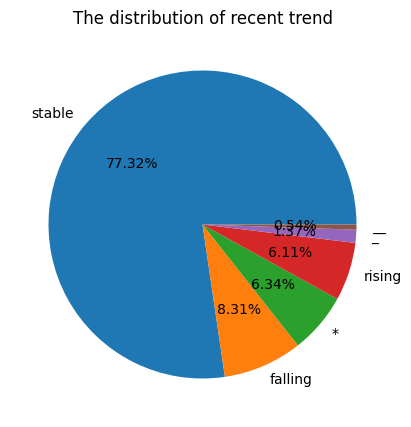

In [11]:
#PieChart
plt.figure(figsize=(10,5))
plt.pie(ir['Recent Trend'].value_counts().values,
        labels=['stable','falling','*','rising','_','__'],autopct='%1.2f%%')
plt.title("The distribution of recent trend")
plt.show()

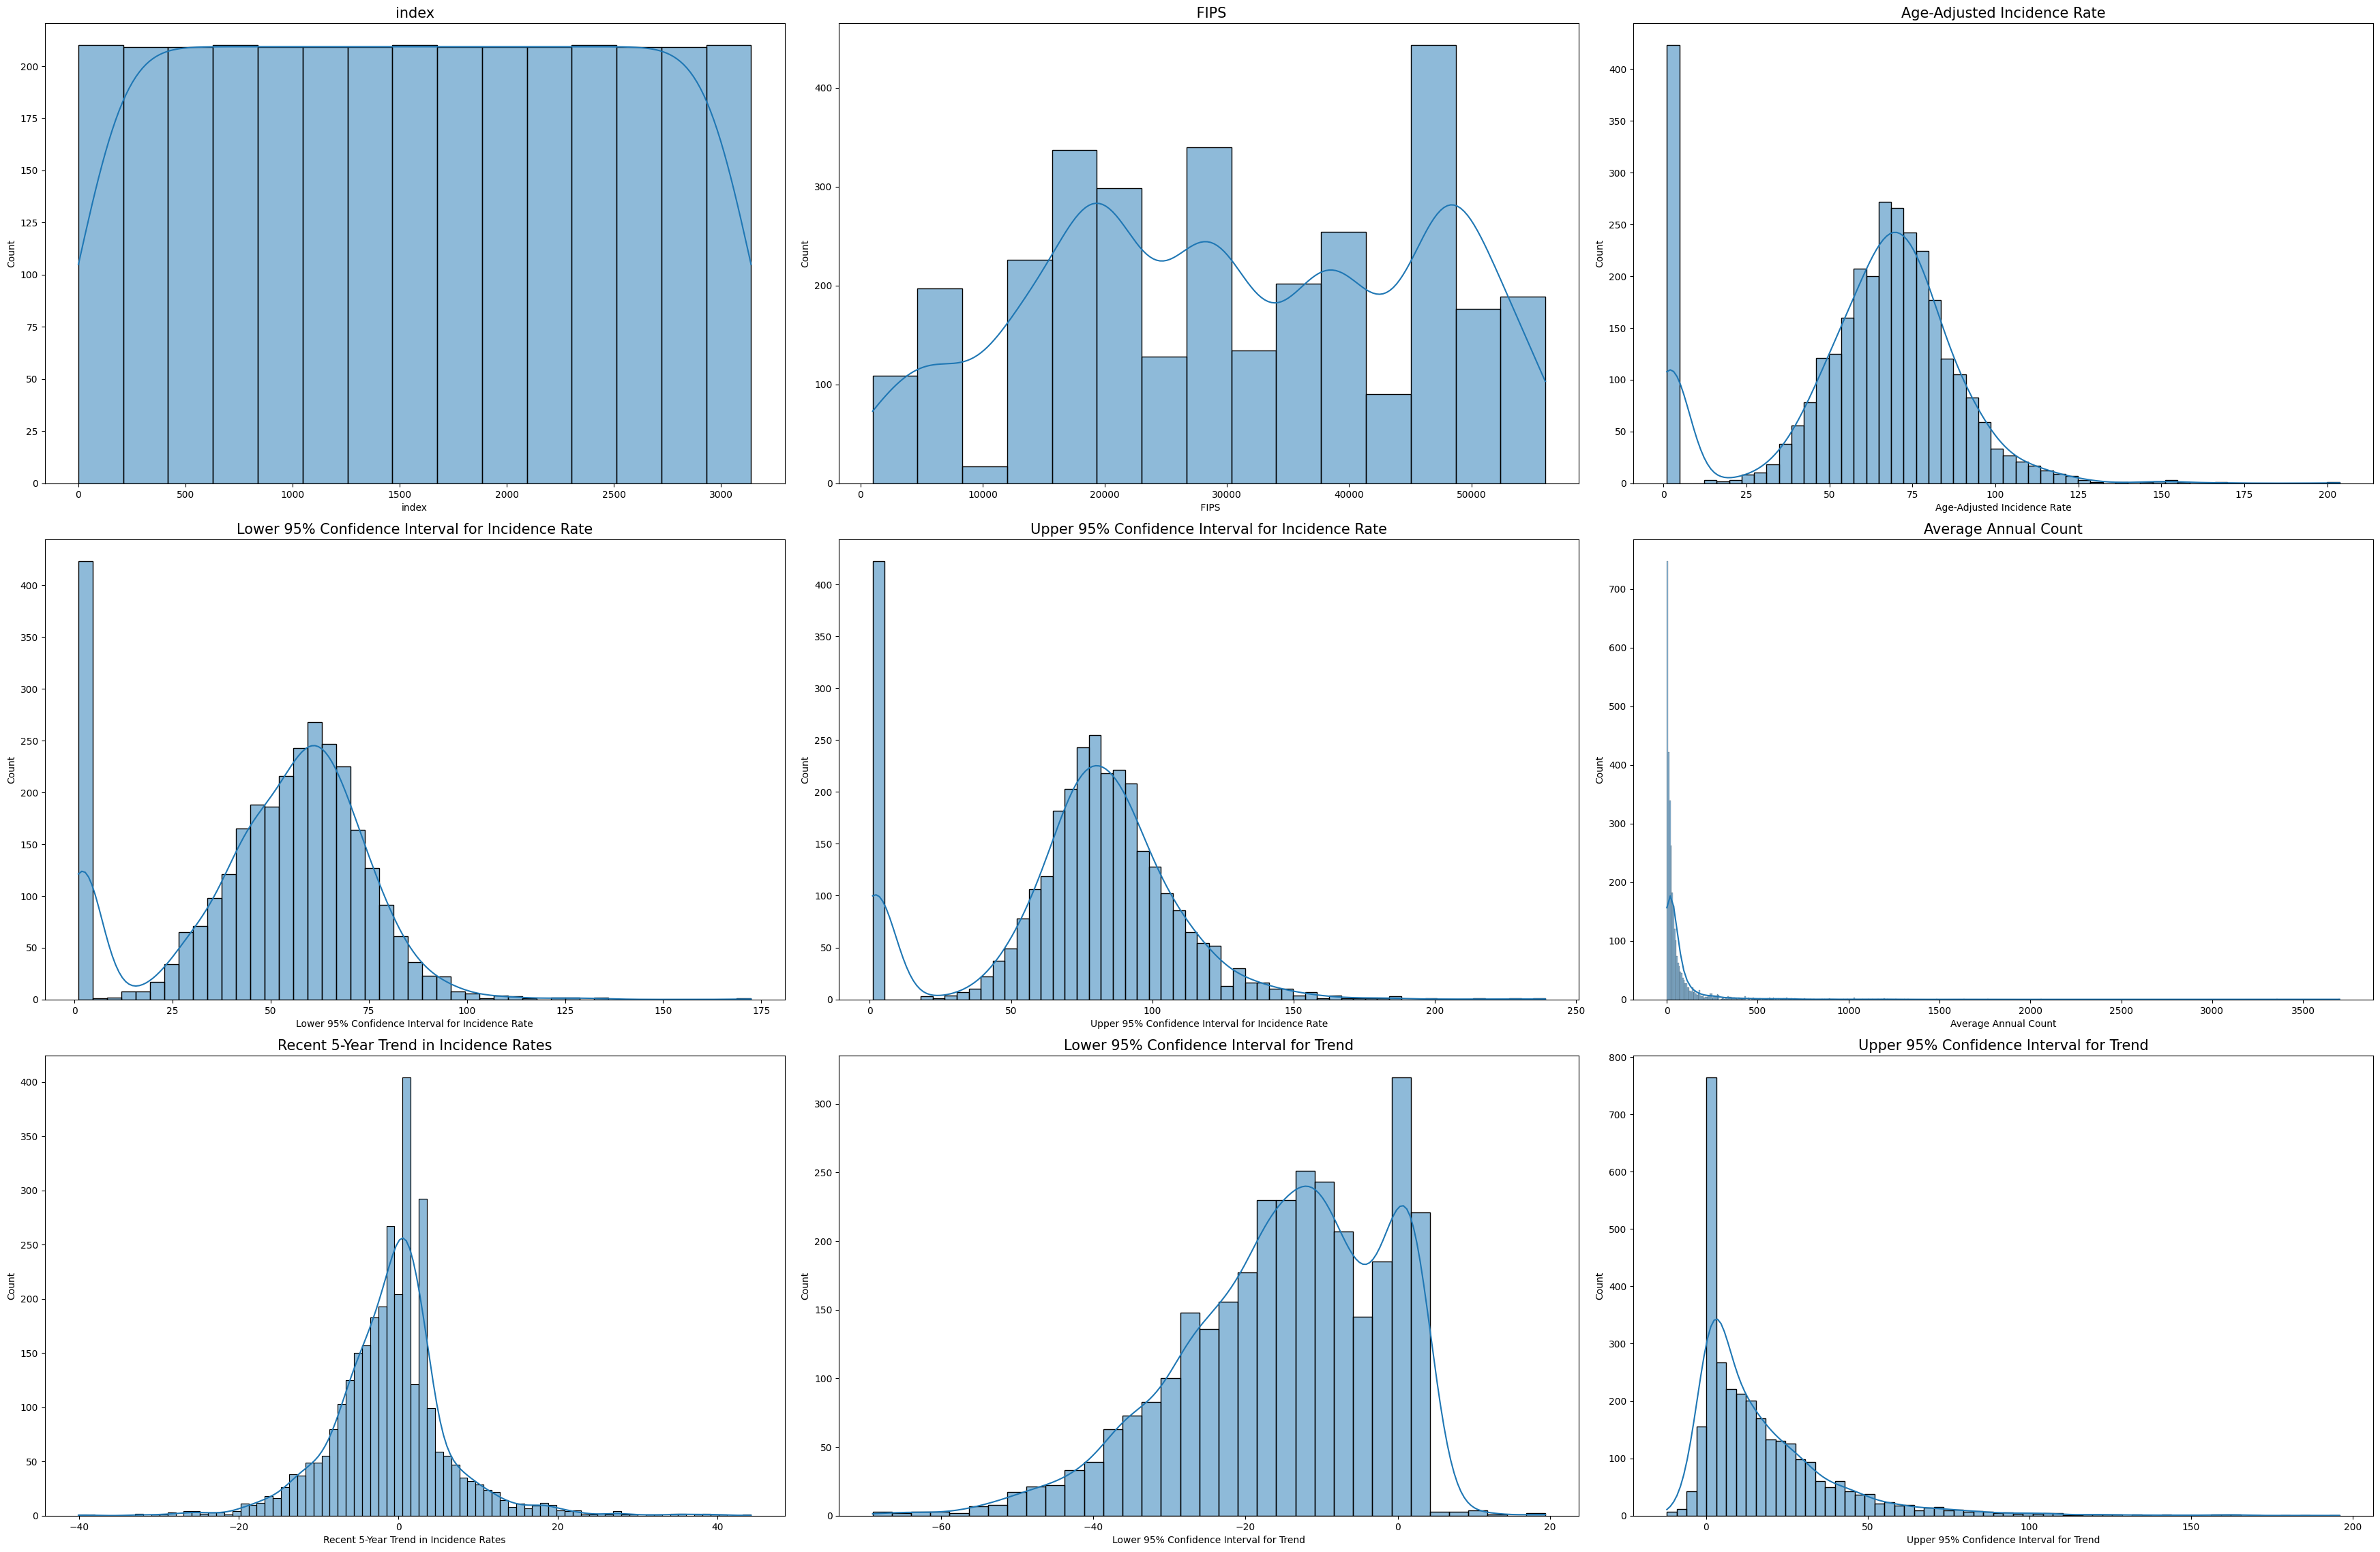

In [12]:
#CountPlot for all numerical columns
plt.figure(figsize=(35,30))
for i,col in enumerate(ir.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(4,3,i)
    plt.title(f"{col}",fontdict= {'fontsize':15})
    sns.histplot(ir[col],kde=True)
    plt.tight_layout()
    plt.plot()

**BI-VARIATE ANALYSIS**

<Axes: xlabel='County', ylabel='count'>

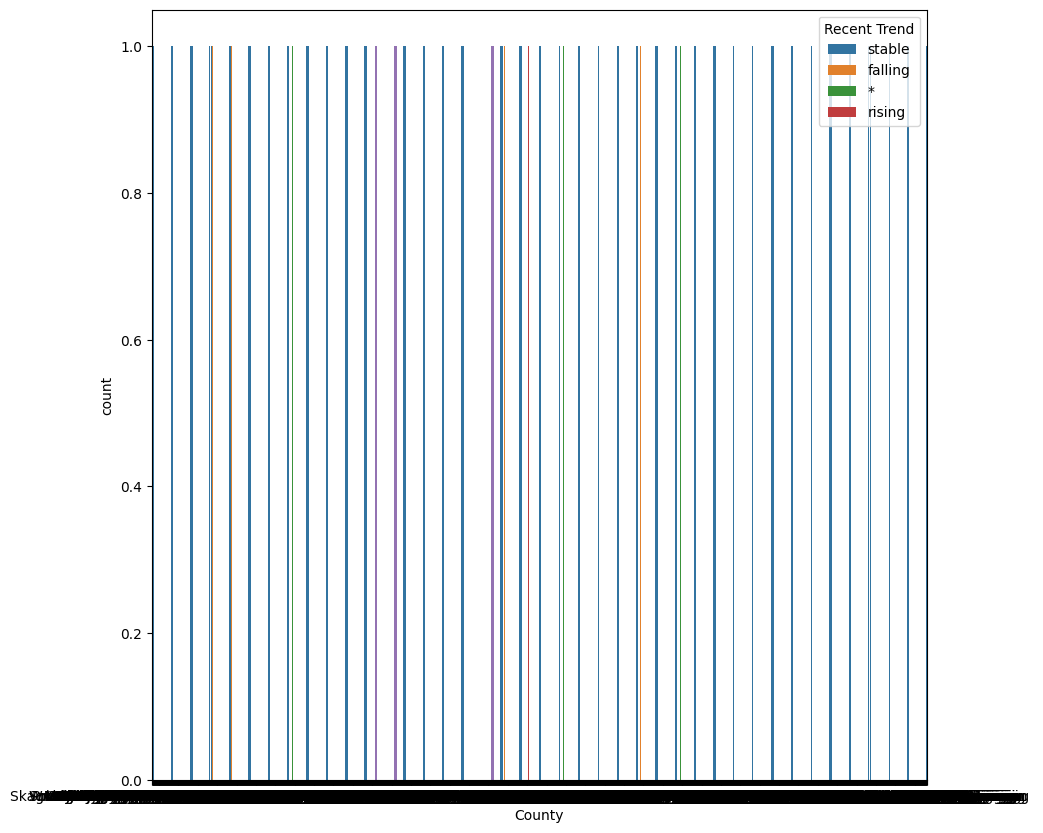

In [13]:
#CountPlot
plt.figure(figsize=(10,10))
sns.countplot(x=ir['County'],hue=ir['Recent Trend'])


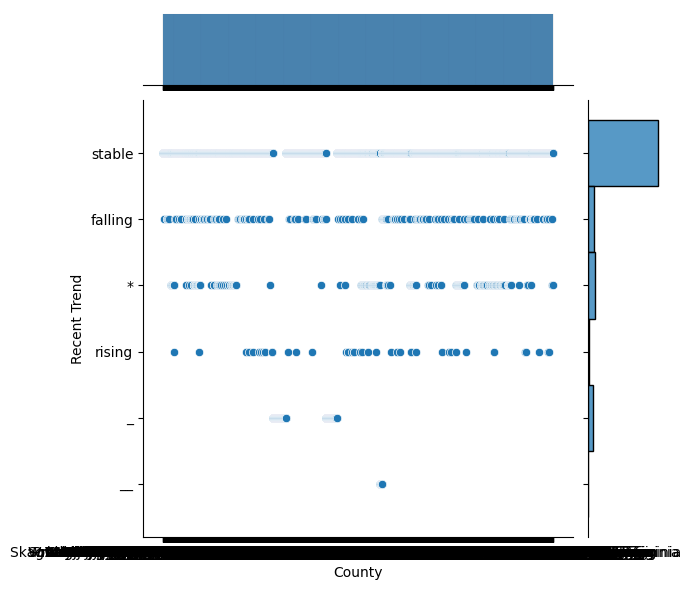

In [14]:
#JointPlot
sns.jointplot(x=ir['County'],y=ir['Recent Trend'])
plt.show()

<Axes: xlabel='County', ylabel='Recent Trend'>

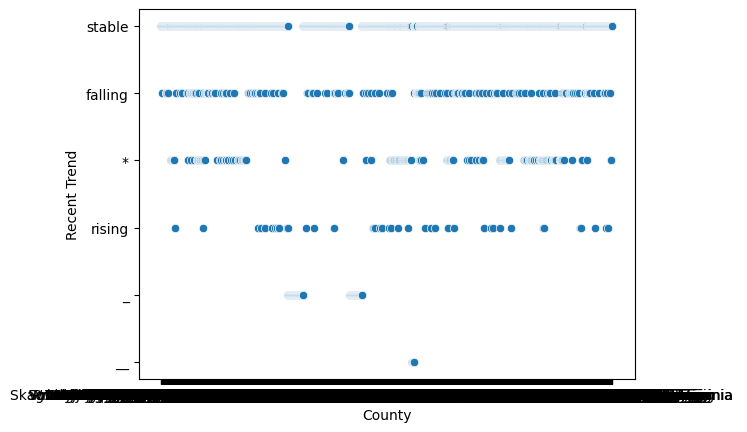

In [15]:
#ScatterPlot
sns.scatterplot(y=ir['Recent Trend'],x=ir['County'])

**MULTI-VARIATE ANALYSIS**

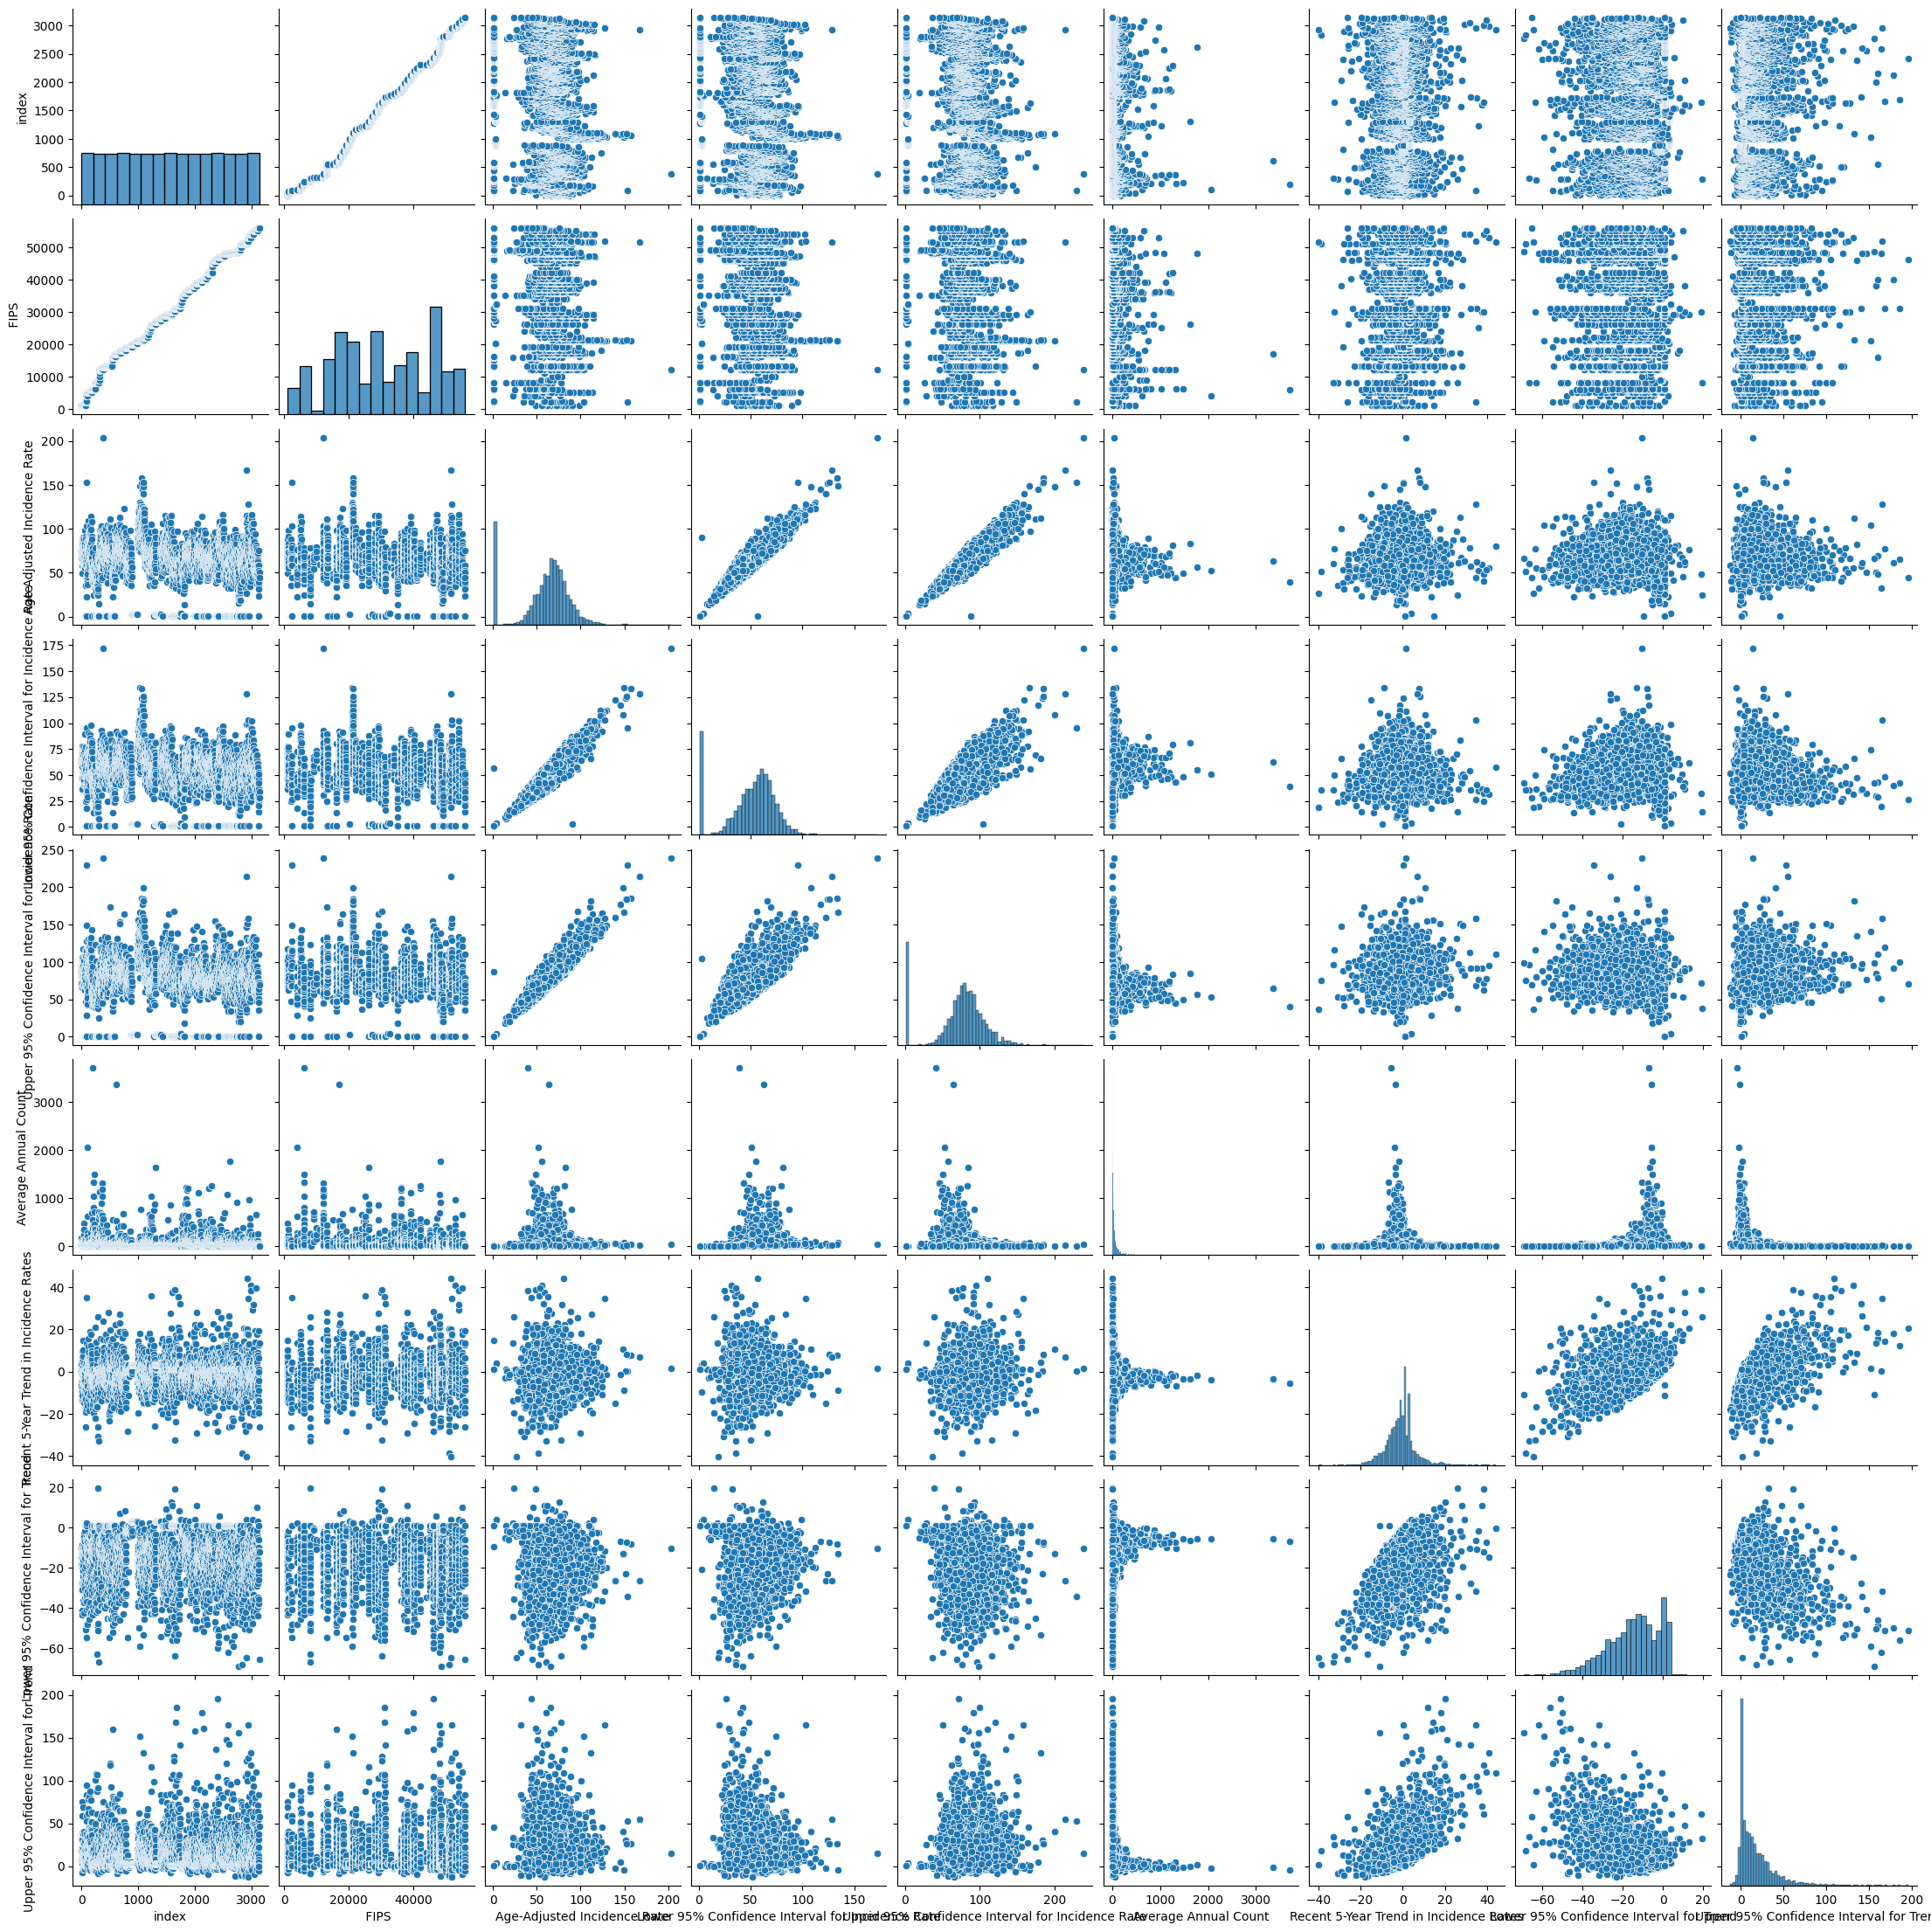

In [16]:
#PairPlot
sns.pairplot(ir)

<ipython-input-17-5bf1a615432a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ir.corr(),annot=True)


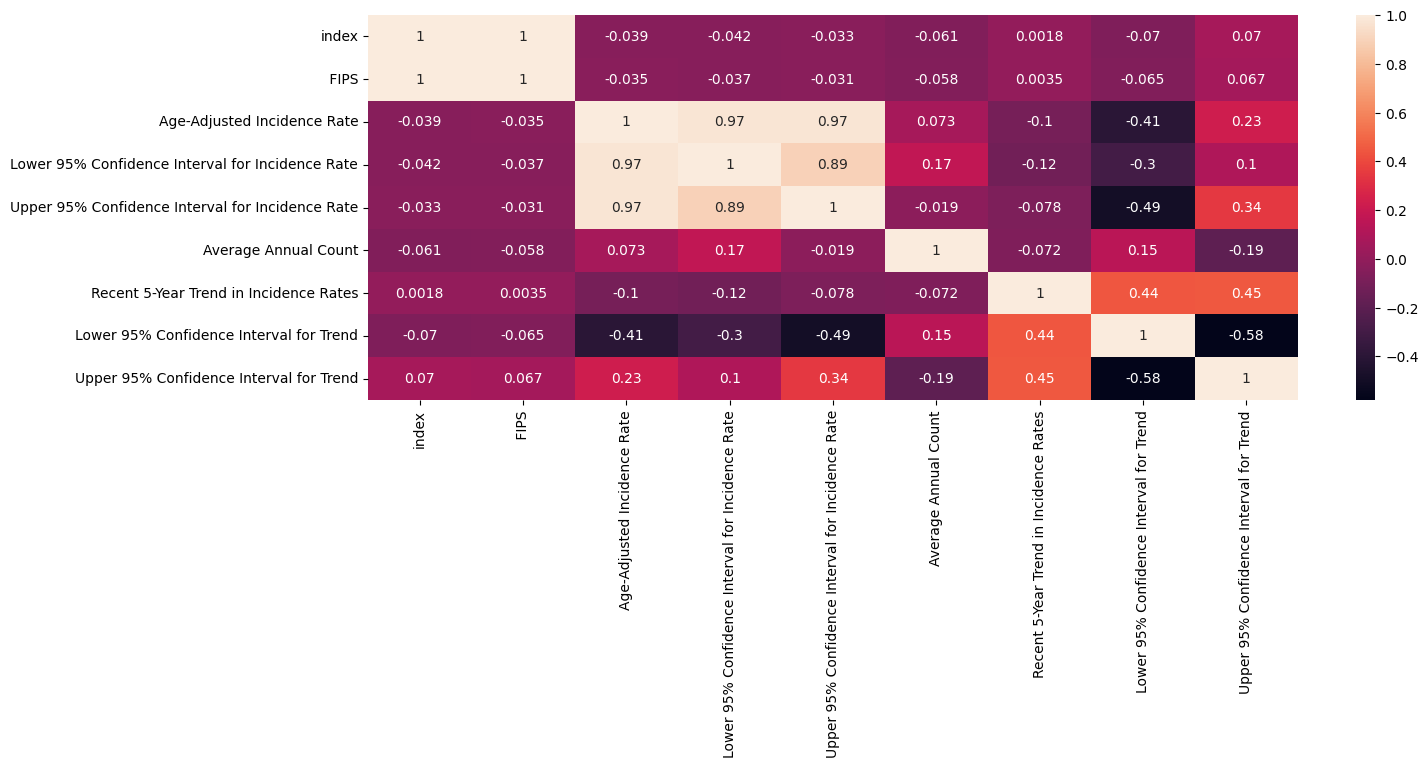

In [17]:
#Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(ir.corr(),annot=True)
plt.show()

##3 PERFORM DESCRIPTIVE STATISTICS ON THE DATASET

In [18]:
#Descriptive statistics of the dataset 
ir.describe()

,index,FIPS,Age-Adjusted Incidence Rate,Lower 95% Confidence Interval for Incidence Rate,Upper 95% Confidence Interval for Incidence Rate,Average Annual Count,Recent 5-Year Trend in Incidence Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1570.500000,30401.960828,60.695478,50.187930,73.672038,66.431847,-0.956752,-14.827070,17.915573
std,906.584249,15150.904099,28.493921,24.376229,35.135227,167.661977,7.362751,13.245046,22.785845
min,1.000000,1001.000000,1.000000,1.000000,1.000000,1.000000,-40.100000,-69.000000,-12.100000
25%,785.750000,18180.500000,50.700000,39.575000,62.200000,8.000000,-4.700000,-23.100000,3.000000
50%,1570.500000,29178.000000,66.300000,55.200000,78.900000,22.000000,-0.600000,-13.200000,10.800000
75%,2355.250000,45081.500000,78.200000,66.500000,93.800000,56.000000,2.800000,-4.200000,25.500000
max,3140.000000,56045.000000,203.700000,172.400000,239.100000,3701.000000,44.200000,19.400000,195.900000


In [19]:
#To determine the mean, median, mode of the dataset
mean=ir.mean()
median=ir.median()
mode=ir.mode()
print(mean,median,mode)

index                                                1570.500000
 FIPS                                               30401.960828
Age-Adjusted Incidence Rate                            60.695478
Lower 95% Confidence Interval for Incidence Rate       50.187930
Upper 95% Confidence Interval for Incidence Rate       73.672038
Average Annual Count                                   66.431847
Recent 5-Year Trend in Incidence Rates                 -0.956752
Lower 95% Confidence Interval for Trend               -14.827070
Upper 95% Confidence Interval for Trend                17.915573
dtype: float64 index                                                1570.5
 FIPS                                               29178.0
Age-Adjusted Incidence Rate                            66.3
Lower 95% Confidence Interval for Incidence Rate       55.2
Upper 95% Confidence Interval for Incidence Rate       78.9
Average Annual Count                                   22.0
Recent 5-Year Trend in Incidence Rates  

<ipython-input-19-0a0de5502a7d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean=ir.mean()
<ipython-input-19-0a0de5502a7d>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median=ir.median()


In [20]:
#To determine the skewness of the dataset
ir.skew()

<ipython-input-20-b1882bb1a728>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ir.skew()


index                                               0.000000
 FIPS                                              -0.079261
Age-Adjusted Incidence Rate                        -0.693020
Lower 95% Confidence Interval for Incidence Rate   -0.585159
Upper 95% Confidence Interval for Incidence Rate   -0.574082
Average Annual Count                                9.278093
Recent 5-Year Trend in Incidence Rates              0.411840
Lower 95% Confidence Interval for Trend            -0.685446
Upper 95% Confidence Interval for Trend             2.577706
dtype: float64

In [21]:
#To determine the kurtosis of the dataset
ir.kurtosis()

<ipython-input-21-2dcc6c693d78>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ir.kurtosis()


index                                                -1.200000
 FIPS                                                -1.098178
Age-Adjusted Incidence Rate                           0.546620
Lower 95% Confidence Interval for Incidence Rate      0.149529
Upper 95% Confidence Interval for Incidence Rate      0.658309
Average Annual Count                                141.150473
Recent 5-Year Trend in Incidence Rates                4.522646
Lower 95% Confidence Interval for Trend               0.241567
Upper 95% Confidence Interval for Trend               9.981987
dtype: float64

In [22]:
#Handling dataset and removing unnecessary columns
ir.drop(columns=['County'],inplace=True)

In [23]:
#Checking the dataset after removal of the columns
ir.head()

,index,FIPS,Age-Adjusted Incidence Rate,Lower 95% Confidence Interval for Incidence Rate,Upper 95% Confidence Interval for Incidence Rate,Average Annual Count,Recent Trend,Recent 5-Year Trend in Incidence Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,1,1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
1,2,1003,66.9,62.4,71.7,170,stable,3.0,-10.2,18.3
2,3,1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3
3,4,1007,86.4,71.0,104.2,23,stable,-4.5,-31.4,32.9
4,5,1009,69.7,61.2,79.0,51,stable,-13.6,-27.8,3.4


In [24]:
ir.shape

(3140, 10)

In [25]:
ir.columns

Index(['index', ' FIPS', 'Age-Adjusted Incidence Rate',
       'Lower 95% Confidence Interval for Incidence Rate',
       'Upper 95% Confidence Interval for Incidence Rate',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend in Incidence Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95% Confidence Interval for Trend'],
      dtype='object')

##4 CHECK FOR MISSING VALUES AND DEAL WITH THEM

In [26]:
#To determine null values in the dataset
ir.isnull()

,index,FIPS,Age-Adjusted Incidence Rate,Lower 95% Confidence Interval for Incidence Rate,Upper 95% Confidence Interval for Incidence Rate,Average Annual Count,Recent Trend,Recent 5-Year Trend in Incidence Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3135,False,False,False,False,False,False,False,False,False,False
3136,False,False,False,False,False,False,False,False,False,False
3137,False,False,False,False,False,False,False,False,False,False
3138,False,False,False,False,False,False,False,False,False,False


In [27]:
#To determine the count of null values of each column
ir.isnull().sum()

index                                               0
 FIPS                                               0
Age-Adjusted Incidence Rate                         0
Lower 95% Confidence Interval for Incidence Rate    0
Upper 95% Confidence Interval for Incidence Rate    0
Average Annual Count                                0
Recent Trend                                        0
Recent 5-Year Trend in Incidence Rates              0
Lower 95% Confidence Interval for Trend             0
Upper 95% Confidence Interval for Trend             0
dtype: int64

In [28]:
#To display the total null value along with the percentage of null values in each column
total = ir.isnull().sum()
percent = (ir.isnull().sum())/(ir.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                                                  Total  Percent
index                                                 0      0.0
 FIPS                                                 0      0.0
Age-Adjusted Incidence Rate                           0      0.0
Lower 95% Confidence Interval for Incidence Rate      0      0.0
Upper 95% Confidence Interval for Incidence Rate      0      0.0
Average Annual Count                                  0      0.0
Recent Trend                                          0      0.0
Recent 5-Year Trend in Incidence Rates                0      0.0
Lower 95% Confidence Interval for Trend               0      0.0
Upper 95% Confidence Interval for Trend               0      0.0


##5 FIND THE OUTLIERS AND REPLACE THEM

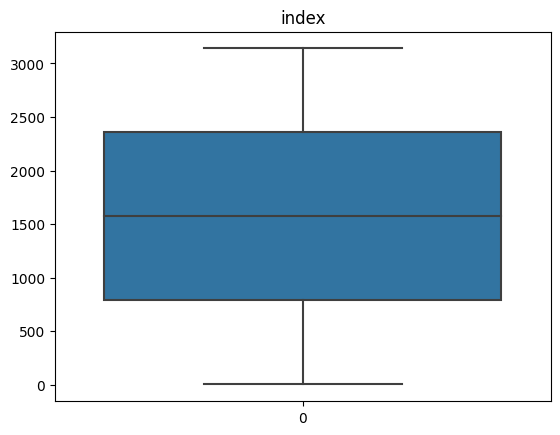

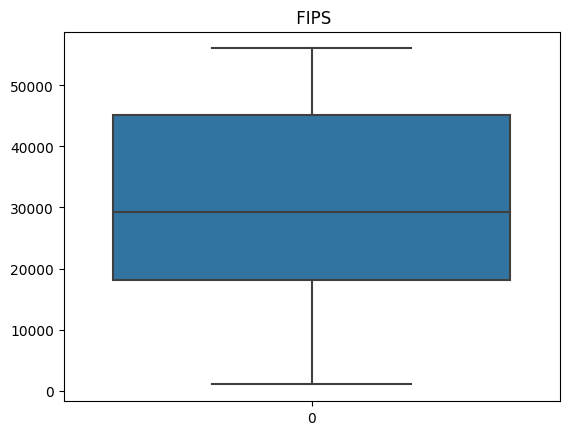

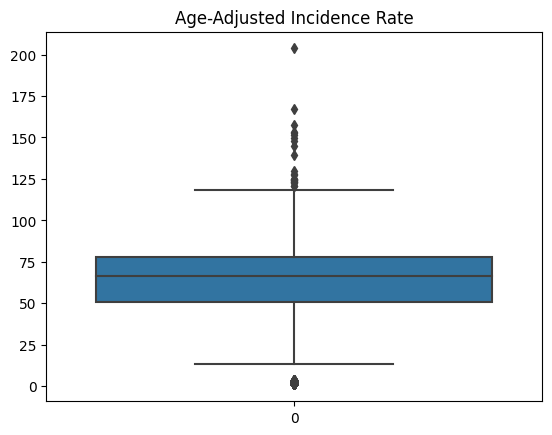

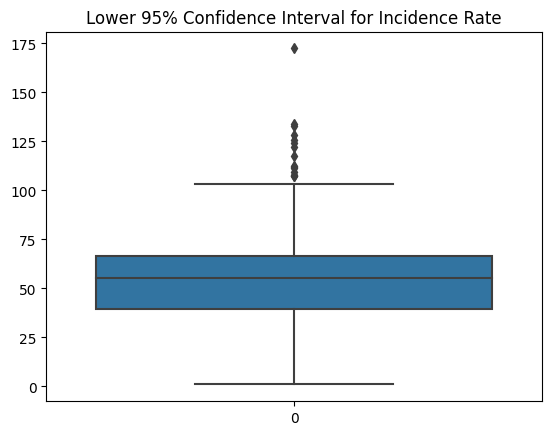

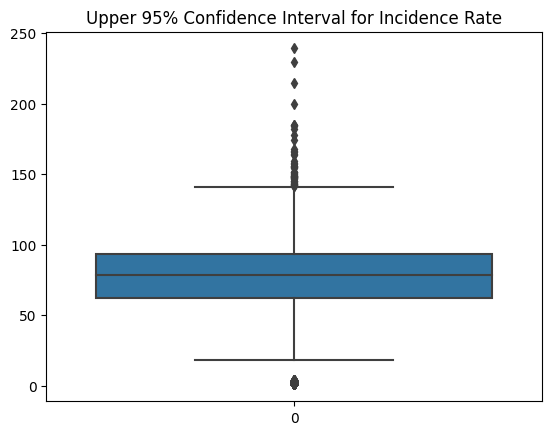

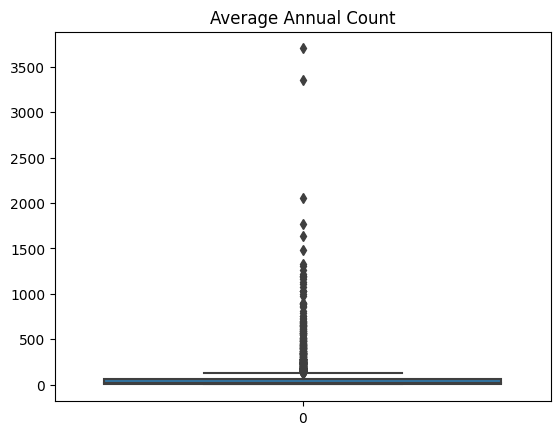

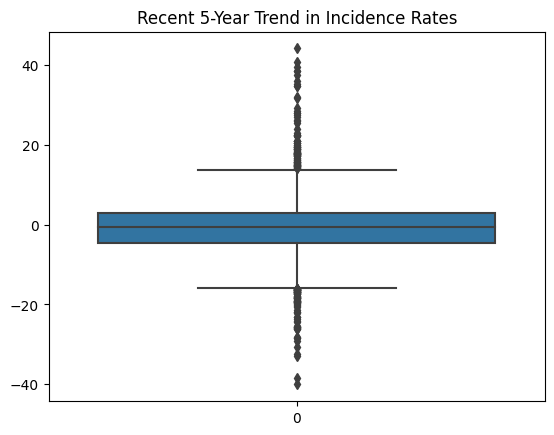

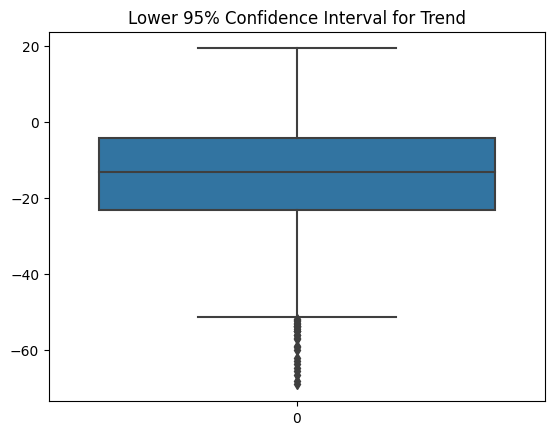

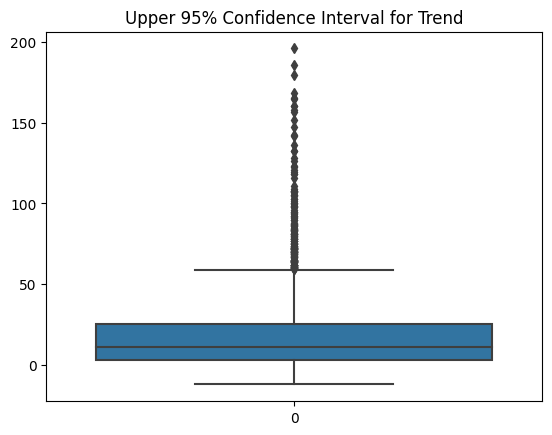

In [29]:
#Checking the outliers present using boxplot
for i in ir.columns:
    if type(ir[i][0])!=str:
        sns.boxplot(ir[i])
        plt.title(i)
        plt.show()

####**REMOVING OUTLIERS USING IQR METHOD**

In [30]:
qnt=ir.quantile(q=(0.25,0.75))
qnt

<ipython-input-30-1e557f281c16>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  qnt=ir.quantile(q=(0.25,0.75))


,index,FIPS,Age-Adjusted Incidence Rate,Lower 95% Confidence Interval for Incidence Rate,Upper 95% Confidence Interval for Incidence Rate,Average Annual Count,Recent 5-Year Trend in Incidence Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0.25,785.75,18180.5,50.7,39.575,62.2,8.0,-4.7,-23.1,3.0
0.75,2355.25,45081.5,78.2,66.500,93.8,56.0,2.8,-4.2,25.5


In [31]:
iqr=qnt.loc[0.75]-qnt.loc[0.25]
iqr

index                                                1569.500
 FIPS                                               26901.000
Age-Adjusted Incidence Rate                            27.500
Lower 95% Confidence Interval for Incidence Rate       26.925
Upper 95% Confidence Interval for Incidence Rate       31.600
Average Annual Count                                   48.000
Recent 5-Year Trend in Incidence Rates                  7.500
Lower 95% Confidence Interval for Trend                18.900
Upper 95% Confidence Interval for Trend                22.500
dtype: float64

In [32]:
l=qnt.loc[0.25]-1.5*iqr
u=qnt.loc[0.75]+1.5*iqr
l,u

(index                                               -1568.5000
  FIPS                                              -22171.0000
 Age-Adjusted Incidence Rate                             9.4500
 Lower 95% Confidence Interval for Incidence Rate       -0.8125
 Upper 95% Confidence Interval for Incidence Rate       14.8000
 Average Annual Count                                  -64.0000
 Recent 5-Year Trend in Incidence Rates                -15.9500
 Lower 95% Confidence Interval for Trend               -51.4500
 Upper 95% Confidence Interval for Trend               -30.7500
 dtype: float64,
 index                                                4709.5000
  FIPS                                               85433.0000
 Age-Adjusted Incidence Rate                           119.4500
 Lower 95% Confidence Interval for Incidence Rate      106.8875
 Upper 95% Confidence Interval for Incidence Rate      141.2000
 Average Annual Count                                  128.0000
 Recent 5-Year Trend in

<Axes: ylabel='Age-Adjusted Incidence Rate'>

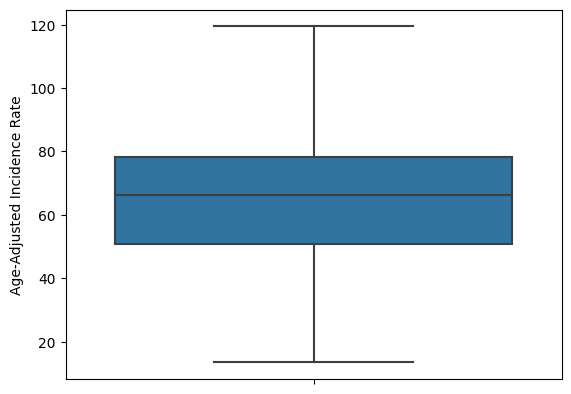

In [33]:
#Age-Adjusted Incidence Rate    
ir['Age-Adjusted Incidence Rate']=np.where(ir['Age-Adjusted Incidence Rate']> 119.4500, 119.4500, 
                   np.where(ir['Age-Adjusted Incidence Rate']< 9.4500, 9.4500,ir['Age-Adjusted Incidence Rate']))
sns.boxplot(y='Age-Adjusted Incidence Rate',data=ir,showfliers=False)

<Axes: ylabel='Upper 95% Confidence Interval for Incidence Rate'>

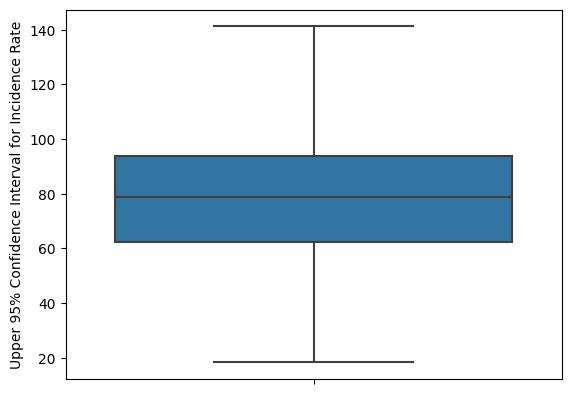

In [34]:
#Lower 95% Confidence Interval for Incidence Rate     
ir['Lower 95% Confidence Interval for Incidence Rate']=np.where(ir['Lower 95% Confidence Interval for Incidence Rate']> 106.8875, 106.8875, 
                   np.where(ir['Lower 95% Confidence Interval for Incidence Rate']< -0.8125, -0.8125,ir['Lower 95% Confidence Interval for Incidence Rate']))
sns.boxplot(y='Upper 95% Confidence Interval for Incidence Rate',data=ir,showfliers=False)

<Axes: ylabel='Upper 95% Confidence Interval for Incidence Rate'>

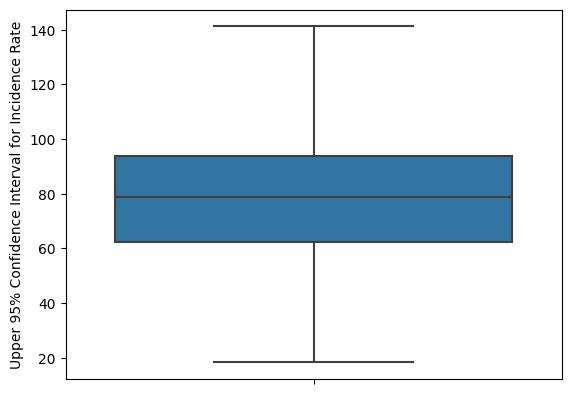

In [35]:
#Upper 95% Confidence Interval for Incidence Rate 
ir['Upper 95% Confidence Interval for Incidence Rate']=np.where(ir['Upper 95% Confidence Interval for Incidence Rate']> 141.2000, 141.2000, 
                   np.where(ir['Upper 95% Confidence Interval for Incidence Rate']< 14.8000, 14.8000,ir['Upper 95% Confidence Interval for Incidence Rate']))
sns.boxplot(y='Upper 95% Confidence Interval for Incidence Rate',data=ir,showfliers=False)


<Axes: ylabel='Average Annual Count'>

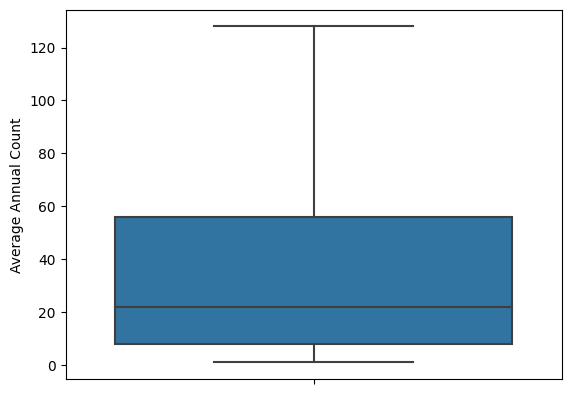

In [36]:
#Average Annual Count 
ir['Average Annual Count']=np.where(ir['Average Annual Count']> 128.0000, 128.0000, 
                   np.where(ir['Average Annual Count']< -64.0000, -64.0000,ir['Average Annual Count']))
sns.boxplot(y='Average Annual Count',data=ir)


<Axes: ylabel='Recent 5-Year Trend in Incidence Rates'>

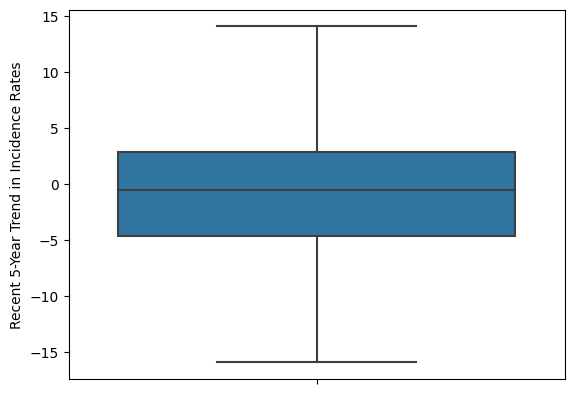

In [37]:
#Recent 5-Year Trend in Incidence Rates  
ir['Recent 5-Year Trend in Incidence Rates']=np.where(ir['Recent 5-Year Trend in Incidence Rates']> 14.0500, 14.0500, 
                   np.where(ir['Recent 5-Year Trend in Incidence Rates']< -15.9500, -15.9500,ir['Recent 5-Year Trend in Incidence Rates']))
sns.boxplot(y='Recent 5-Year Trend in Incidence Rates',data=ir)


<Axes: ylabel='Lower 95% Confidence Interval for Trend'>

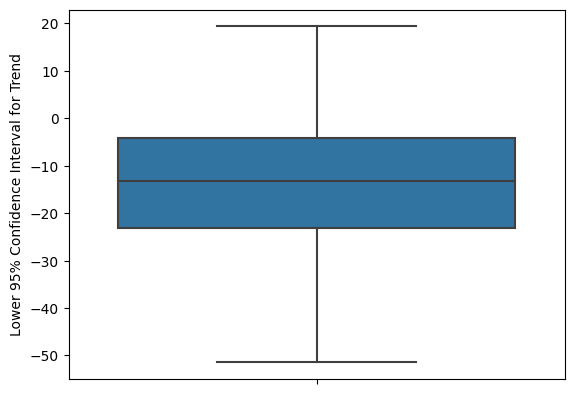

In [38]:
#Lower 95% Confidence Interval for Trend
ir['Lower 95% Confidence Interval for Trend']=np.where(ir['Lower 95% Confidence Interval for Trend']> 24.1500, 24.1500, 
                   np.where(ir['Lower 95% Confidence Interval for Trend']< -51.4500, -51.4500,ir['Lower 95% Confidence Interval for Trend']))
sns.boxplot(y='Lower 95% Confidence Interval for Trend',data=ir)


<Axes: ylabel='Upper 95% Confidence Interval for Trend'>

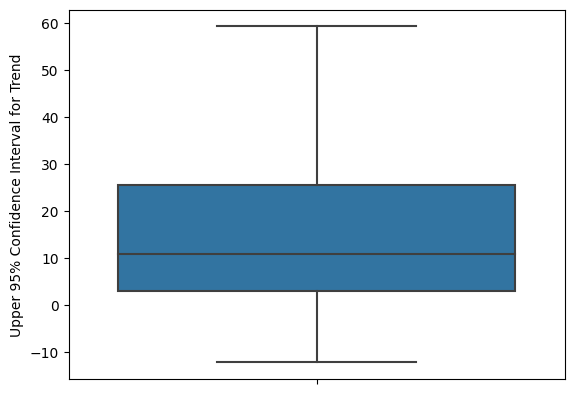

In [39]:
#Upper 95% Confidence Interval for Trend 
ir['Upper 95% Confidence Interval for Trend']=np.where(ir['Upper 95% Confidence Interval for Trend']> 59.2500, 59.2500, 
                   np.where(ir['Upper 95% Confidence Interval for Trend']< -30.7500, -30.7500,ir['Upper 95% Confidence Interval for Trend']))
sns.boxplot(y='Upper 95% Confidence Interval for Trend',data=ir)

##6 CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING

In [40]:
#displaying only the categorical columns
ir1=ir.select_dtypes(include=['object'])
ir1

,Recent Trend
0,stable
1,stable
2,stable
3,stable
4,stable
...,...
3135,stable
3136,stable
3137,stable
3138,stable


In [41]:
ir['Recent Trend'].unique()

array(['stable', 'falling', '*', 'rising', '_', '__'], dtype=object)

In [42]:
#Label Encoding
le = LabelEncoder()
ir['Recent Trend'].replace({"*":1,"_":3,"__":4,"stable":5,"falling":6,"rising":7},inplace=True)

In [43]:
#displaying all columns after label encoding
ir.select_dtypes(include=['object'])
ir

,index,FIPS,Age-Adjusted Incidence Rate,Lower 95% Confidence Interval for Incidence Rate,Upper 95% Confidence Interval for Incidence Rate,Average Annual Count,Recent Trend,Recent 5-Year Trend in Incidence Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,1,1001,74.9,65.1,85.7,43.0,5,0.50,-14.90,18.6
1,2,1003,66.9,62.4,71.7,128.0,5,3.00,-10.20,18.3
2,3,1005,74.6,61.8,89.4,25.0,5,-6.40,-18.30,7.3
3,4,1007,86.4,71.0,104.2,23.0,5,-4.50,-31.40,32.9
4,5,1009,69.7,61.2,79.0,51.0,5,-13.60,-27.80,3.4
...,...,...,...,...,...,...,...,...,...,...
3135,3136,56037,39.9,30.5,51.1,14.0,5,12.60,-18.10,54.9
3136,3137,56039,23.7,14.7,36.1,5.0,5,-15.95,-35.50,0.1
3137,3138,56041,31.7,20.8,46.1,6.0,5,-0.10,-18.30,22.0
3138,3139,56043,50.0,33.8,72.2,6.0,5,13.50,-12.20,46.7


##7 SPLIT THE DATA INTO TRAINING AND TESTING

In [44]:
x_train, x_test, y_train, y_test = train_test_split(
                                        ir.drop(columns=['Recent Trend']),
                                        ir['Recent Trend'],
                                        random_state=1234,test_size = 0.20,
                                        shuffle=True
                                        )
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2512, 9)
(628, 9)
(2512,)
(628,)


In [45]:
x_train.head()

,index,FIPS,Age-Adjusted Incidence Rate,Lower 95% Confidence Interval for Incidence Rate,Upper 95% Confidence Interval for Incidence Rate,Average Annual Count,Recent 5-Year Trend in Incidence Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
516,517,13267,100.8,84.0,120.0,26.0,-5.2,-30.4,29.10
638,639,17091,73.6,67.0,80.7,94.0,-5.0,-13.9,4.70
1997,1998,38019,50.3,30.1,84.6,4.0,13.5,-50.1,59.25
2342,2343,45057,67.5,60.3,75.3,68.0,-3.1,-13.6,8.60
582,583,16067,54.8,42.0,70.5,13.0,5.1,-7.9,20.00


##8 NORMALIZING DATA

In [46]:
from sklearn.preprocessing import Normalizer
Data_normalizer = Normalizer(norm='l1').fit(x_train)
x_train_normalized = Data_normalizer.transform(x_train)
x_test_normalized = Data_normalizer.transform(x_test)

##9 BUILDING THE MODEL
##10 TRAINING THE MODEL 
##11 TESTING THE MODEL



In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [48]:
def models_eval_mm(x_train,y_train,x_test,y_test):
   
    print('--XGBoost')
    xgb = XGBClassifier(n_estimators=300,n_jobs=-1,random_state=1234) 
    y_train=le.fit_transform(y_train)
    xgb.fit(x_train,y_train)
    print('Train Score:',xgb.score(x_train,y_train))
    print('Test Score:',xgb.score(x_test,y_test))
    y_train = le.inverse_transform(y_train)
    print()
    
    print('--KNN')
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    print('Train Score:',knn.score(x_train,y_train))
    print('Test Score:',knn.score(x_test,y_test))
    print()
    
    print('--Random Forest')
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(x_train,y_train)
    print('Train Score:',rf.score(x_train,y_train))
    print('Test Score:',rf.score(x_test,y_test))
    print()

    print('--SVM classifier')
    svc = svm.SVC(random_state=1234,kernel='rbf',C= 10, gamma= 5 , tol = 1e-2,verbose = 1)
    svc.fit(x_train,y_train)
    print('Train Score:',svc.score(x_train,y_train))
    print('Test Score:',svc.score(x_test,y_test))
    print()

    print('--Naive Bayes')
    gnb=GaussianNB()
    gnb.fit(x_train,y_train)
    print('Train Score:',gnb.score(x_train,y_train))
    print('Test Score:',gnb.score(x_test,y_test))
    print()

    print('--Decision Tree')
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    print('Train Score:',dt.score(x_train,y_train))
    print('Test Score:',dt.score(x_test,y_test))
    print()

    return xgb,knn,rf,svc,gnb,dt

In [49]:
xgb,knn,rf,svc,gnb,dt = models_eval_mm(x_train_normalized,y_train,x_test_normalized,y_test)

--XGBoost
Train Score: 1.0
Test Score: 0.0

--KNN
Train Score: 0.9243630573248408
Test Score: 0.8996815286624203

--Random Forest
Train Score: 1.0
Test Score: 0.9984076433121019

--SVM classifier
[LibSVM]Train Score: 0.7826433121019108
Test Score: 0.7722929936305732

--Naive Bayes
Train Score: 0.45660828025477707
Test Score: 0.4410828025477707

--Decision Tree
Train Score: 1.0
Test Score: 0.9984076433121019



####**HYPERPARAMETER TUNING FOR RANDOM FOREST**

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 500,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_cv = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_cv)

{'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [52]:
randomcv_rf=RandomizedSearchCV(estimator=rf,param_distributions=random_cv,n_iter=100,cv=3)

In [53]:
randomcv_rf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336, 391, 445, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 111, 122, 133,
                                                         144, 155, 166, 177,
                                                         188, 200]})

In [54]:
best_random_cv=randomcv_rf.best_estimator_

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [56]:
y_pred=best_random_cv.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 63   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0   3   0   0   0]
 [  0   0   0 481   0   0]
 [  0   0   0   0  38   0]
 [  0   0   0   0   0   7]]
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00       481
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00         7

    accuracy                           1.00       628
   macro avg       1.00      1.00      1.00       628
weighted avg       1.00      1.00      1.00       628



##12 COMPARING THE MODELS 

In [57]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
def eval(name,model):
    y_pred = model.predict(x_test_normalized)
    result =[]
    result.append(name)
    result.append("{:.2f}".format(accuracy_score(y_test, y_pred) * 100))
    result.append("{:.2f}".format(f1_score(y_test, y_pred, average='micro') * 100))
    result.append("{:.2f}".format(recall_score(y_test, y_pred,average='micro') * 100))
    result.append("{:.2f}".format(precision_score(y_test, y_pred,average='micro') * 100))
    return result

In [58]:
model_list = {
    'XGBoost':xgb,
    'KNN':knn,
    'Random Forest':rf,
    'Support Vector Classifier':svc,
    'Naive Bayes':gnb,
    'Decision Tree':dt
}

In [59]:
model_eval_info = []
for i in model_list.keys():
    model_eval_info.append(eval(i,model_list[i]))
model_eval_info = pd.DataFrame(model_eval_info,columns=['Name','Accuracy','f1_score','Recall','Precision'])
model_eval_info.to_csv('model_eval.csv')
model_eval_info

,Name,Accuracy,f1_score,Recall,Precision
0,XGBoost,0.00,0.00,0.00,0.00
1,KNN,89.97,89.97,89.97,89.97
2,Random Forest,99.84,99.84,99.84,99.84
3,Support Vector Classifier,77.23,77.23,77.23,77.23
4,Naive Bayes,44.11,44.11,44.11,44.11
5,Decision Tree,99.84,99.84,99.84,99.84


In [60]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('model_eval.csv')
df

,Unnamed: 0,Name,Accuracy,f1_score,Recall,Precision
0,0,XGBoost,0.00,0.00,0.00,0.00
1,1,KNN,89.97,89.97,89.97,89.97
2,2,Random Forest,99.84,99.84,99.84,99.84
3,3,Support Vector Classifier,77.23,77.23,77.23,77.23
4,4,Naive Bayes,44.11,44.11,44.11,44.11
5,5,Decision Tree,99.84,99.84,99.84,99.84


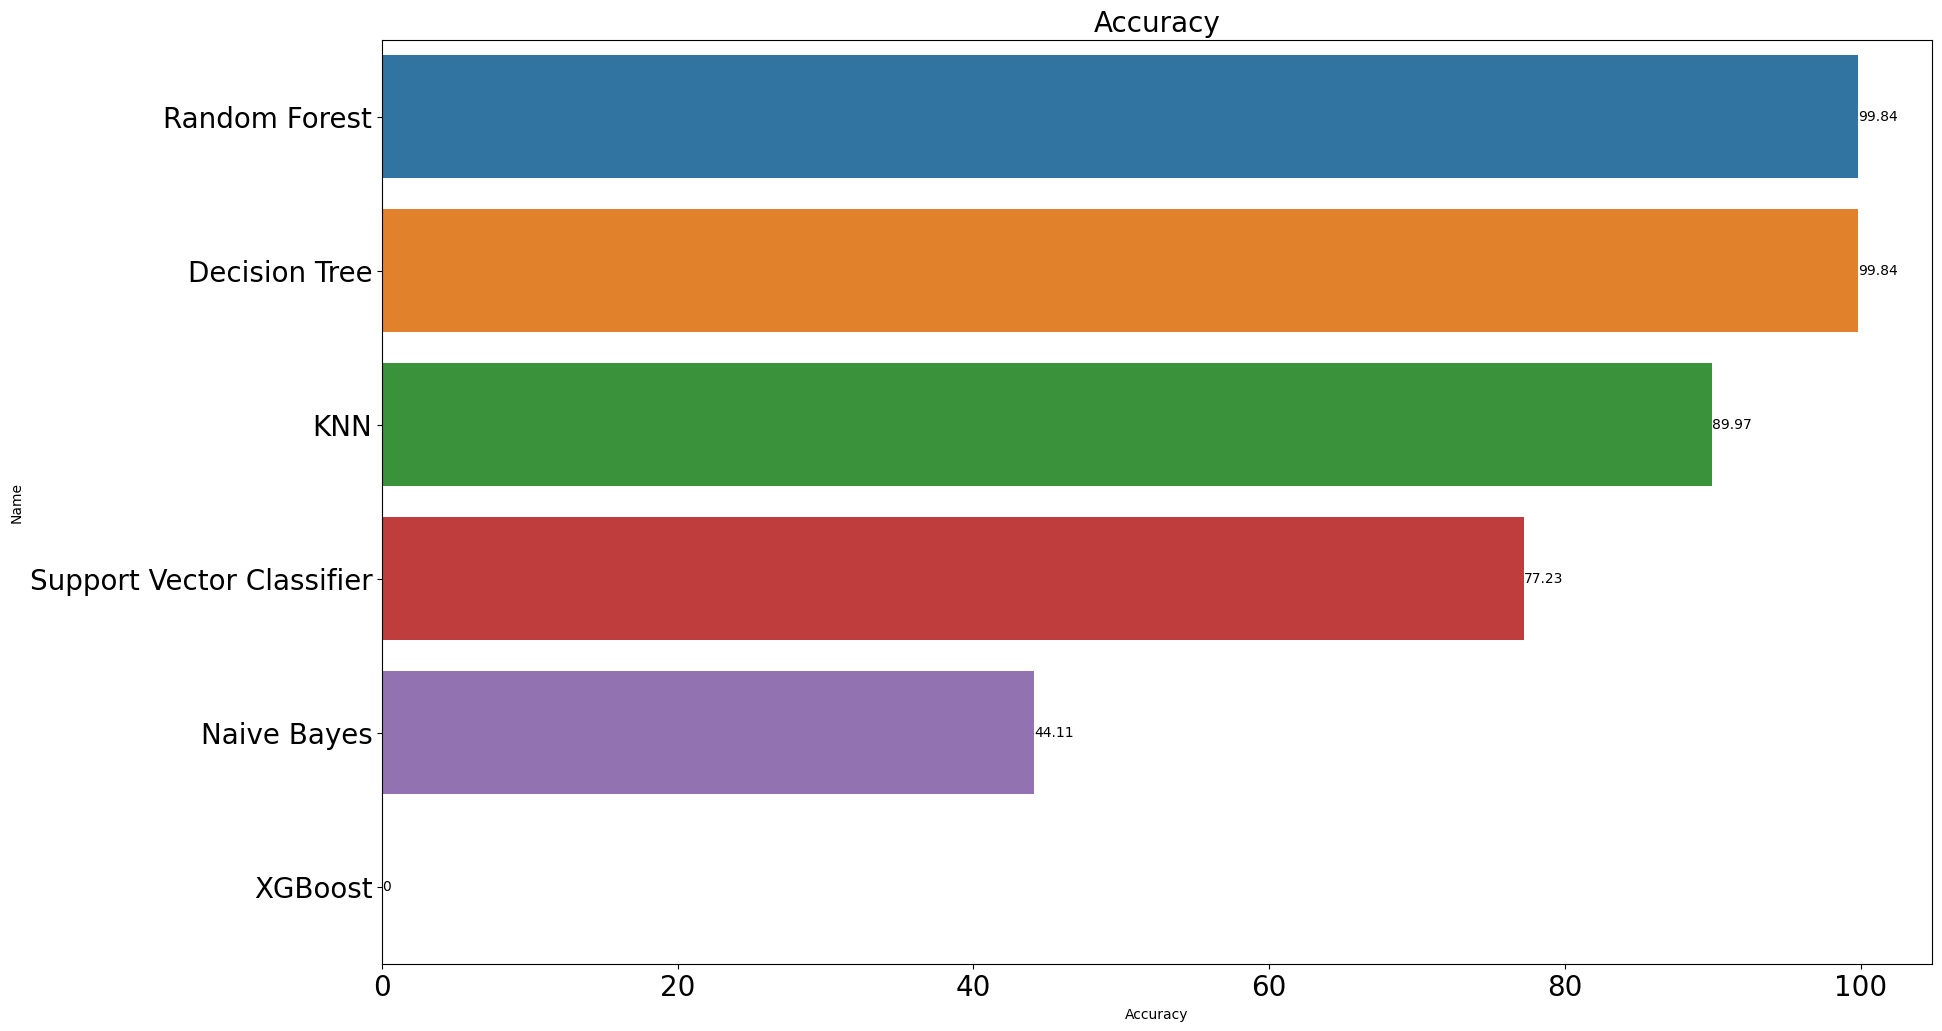

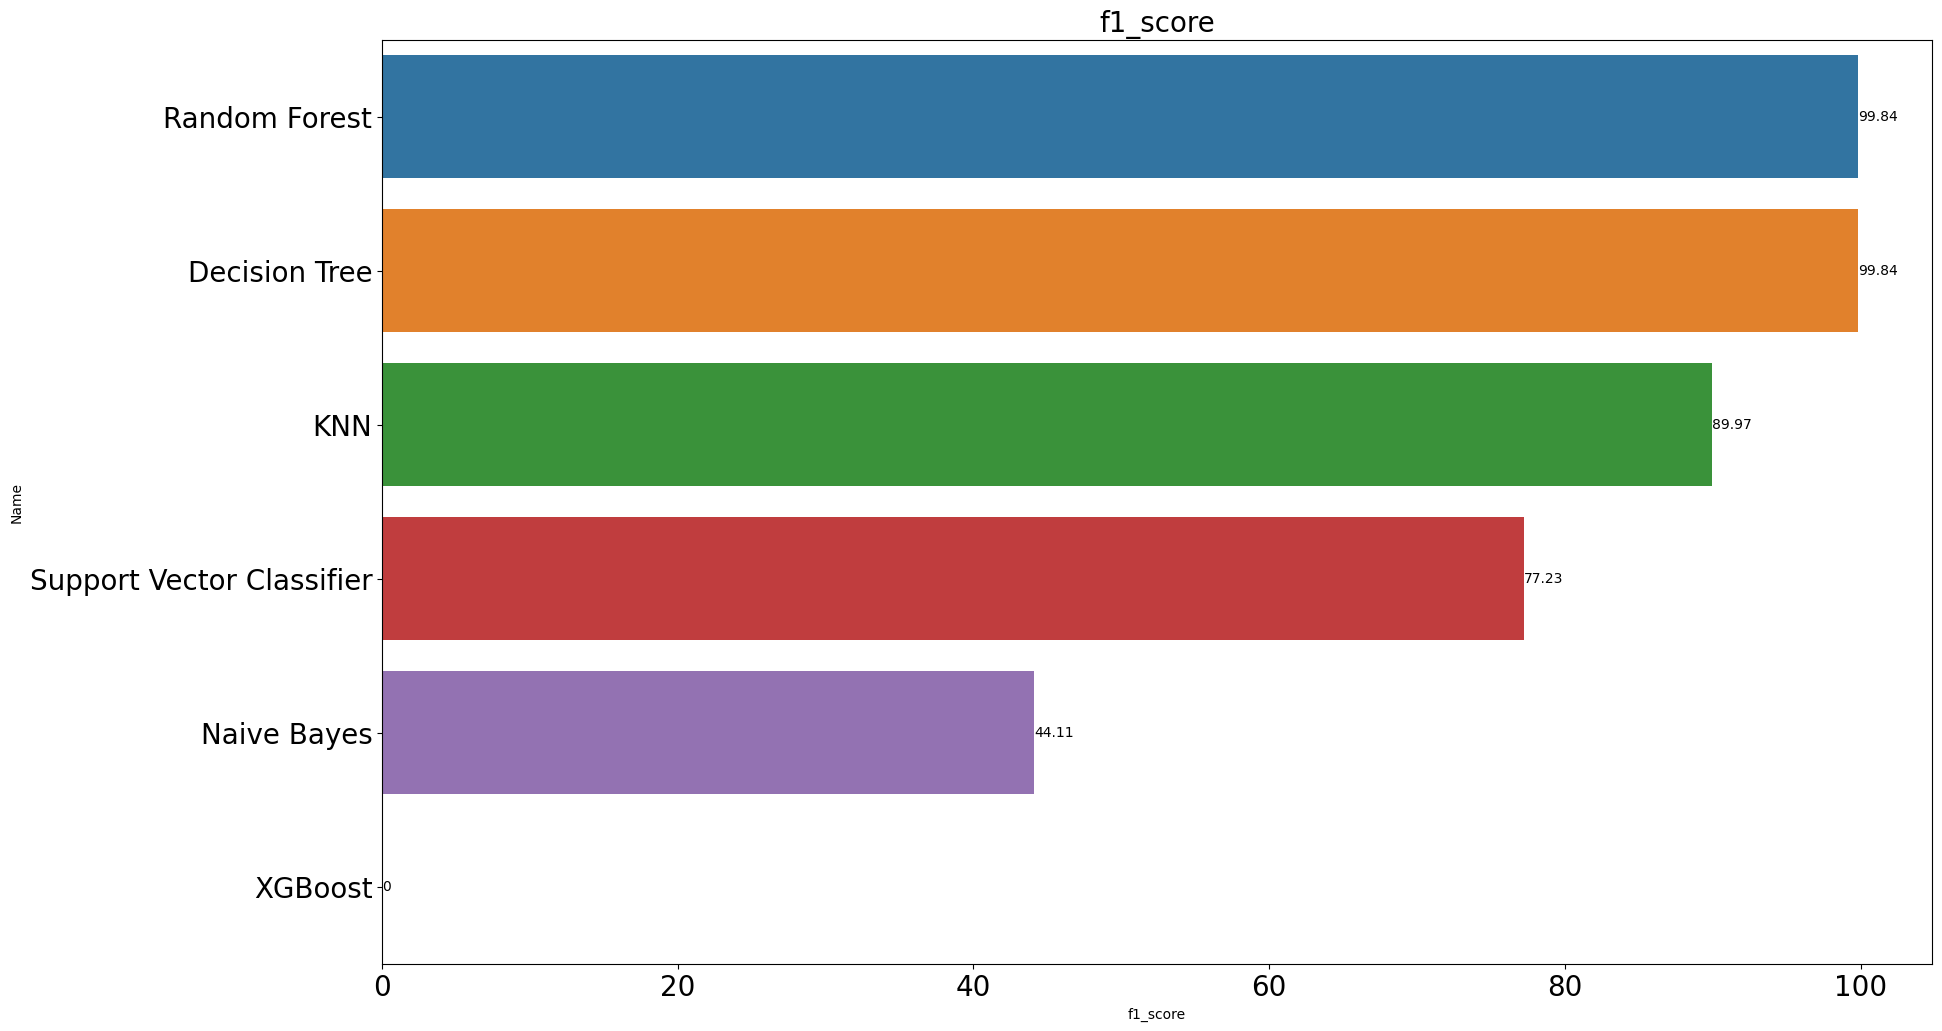

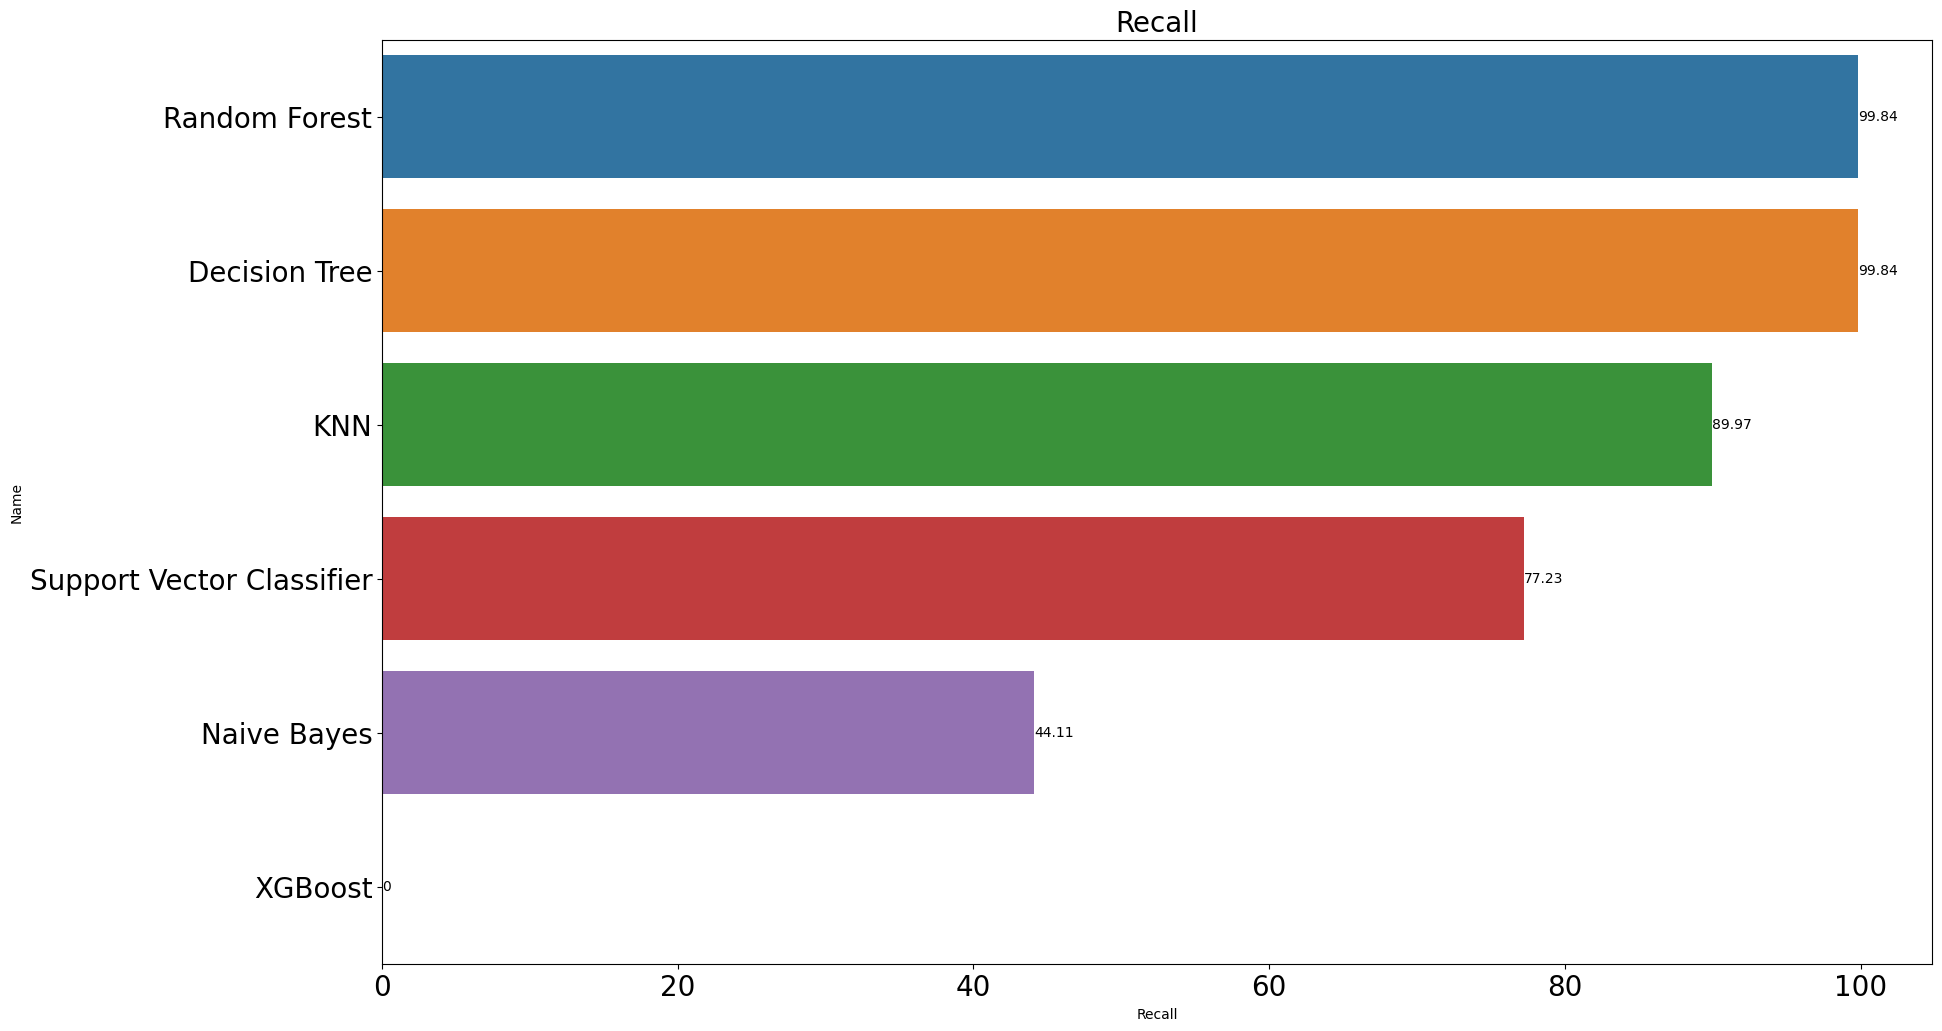

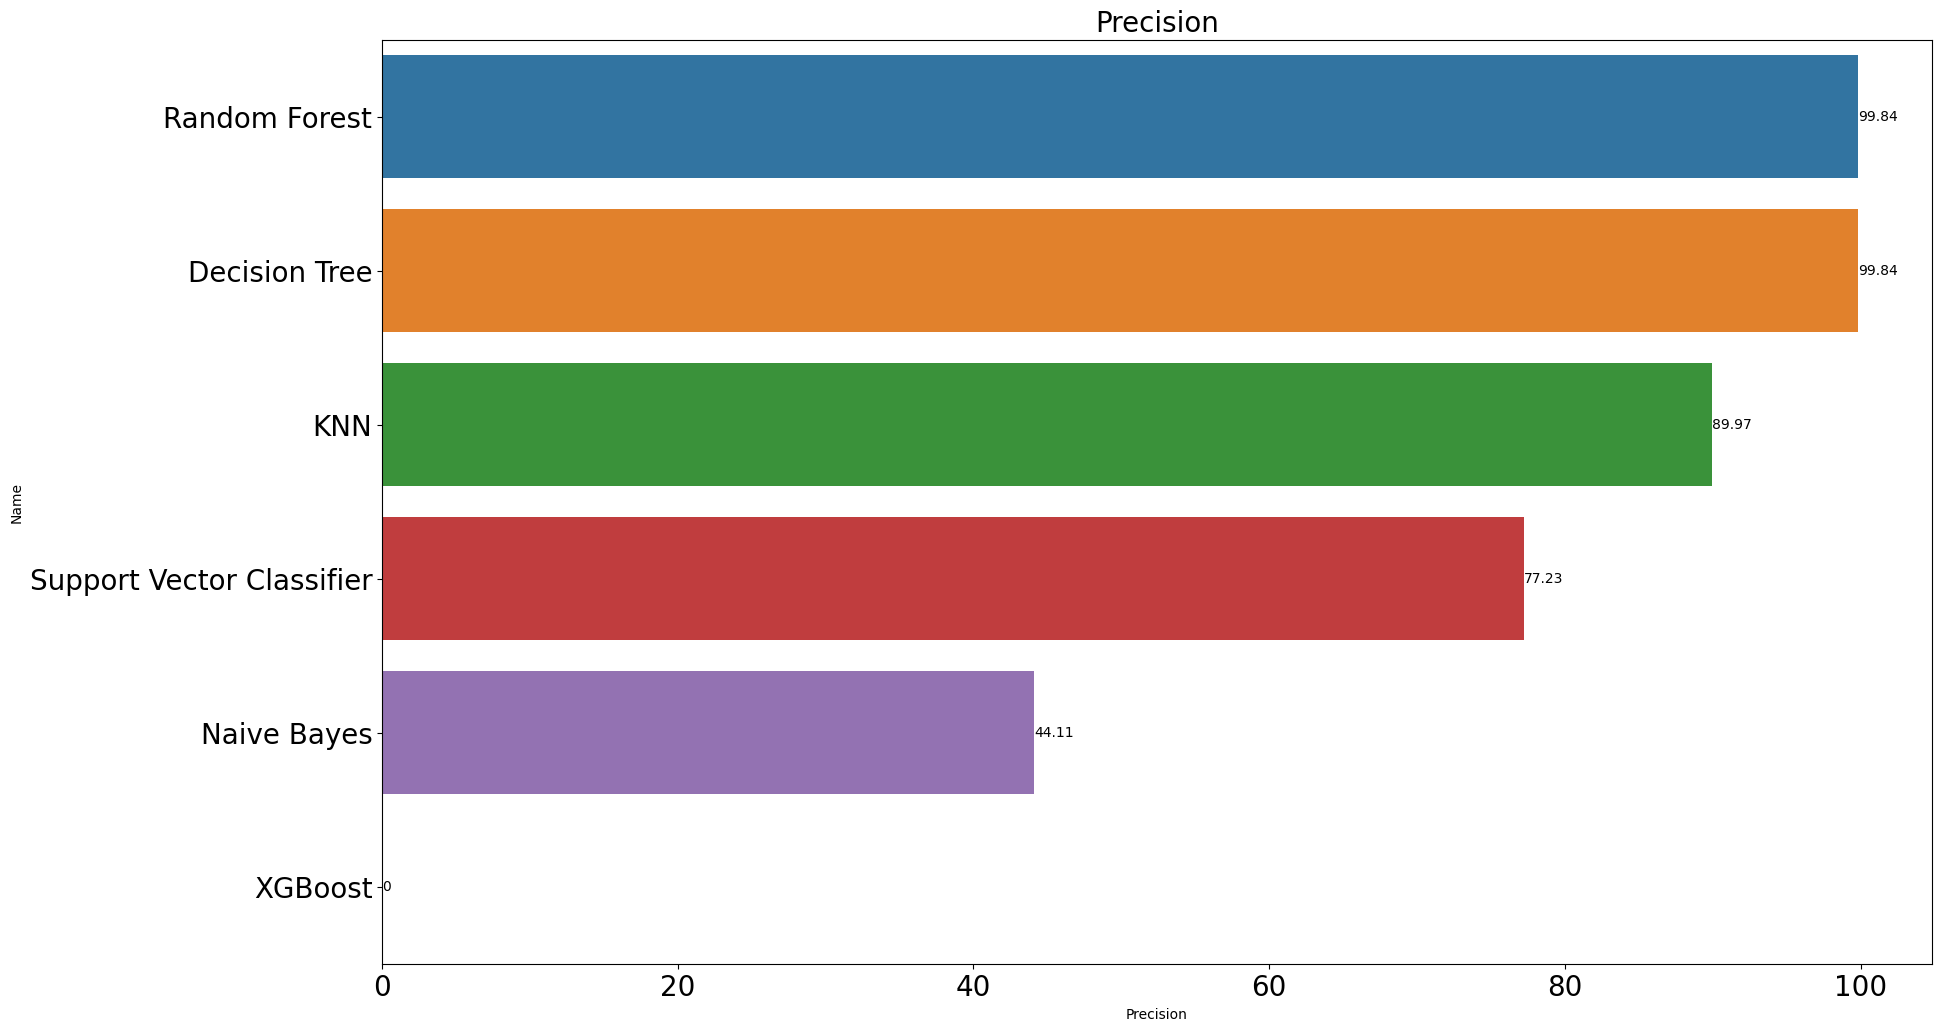

In [61]:
for i in df.columns[2:]:
    plt.figure(figsize=(20, 12))
    plt.title(i,fontsize=20)
    b=sns.barplot(y='Name',x=i,data=df,order=df.sort_values(i,ascending = False).Name)
    b.tick_params(labelsize=20)
    b.bar_label(b.containers[0])
    plt.show()

##13 SAVING THE BEST MODEL

In [62]:
import pickle as pkl

In [63]:
pkl.dump(rf, open('rf_acc_68.pkl', 'wb'))

##14 LOADING THE BEST MODEL

In [64]:
model = pkl.load(open('rf_acc_68.pkl', 'rb'))

##15 TESTING THE SAVED MODEL BY GIVING RANDOM VALUES

In [65]:
a=model.predict([[3.3,253,0,11,0,3.7,0,0,0]])
pickle=int(a)
pickle

5

In [66]:
b=model.predict([[1,2,3,4,1,0,7.1,3,1]])
pickle=int(b)
pickle

1

In [67]:
c=model.predict([[131312,45,43,145,12354,456,3325,245,745]])
pickle=int(c)
pickle

1

In [68]:
d=model.predict([[0.554958, -0.724663,	1.173023,	1.104255,	1.017640,	-0.920041,	1.261972,	-0.045856,	-1.638298]])
pickle=int(d)
pickle

6

In [69]:
e=model.predict([[0.3146,0.3714341,0.145,0.436,2.3461,1.452,0.346799,145,134]])
pickle=int(e)
pickle

7